<div style="text-align: right"> 08.11.2019</div>

***Name:*** 

# Hausaufgabe Blatt 3

## Integration einer Bewegungsgleichung: Freier Fall

In dieser Aufgabe werden wir die Bewegungsgleichung des freien Falls numerisch integrieren. Die Bewegungsgleichung in einer Dimension hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Die analytische Lösung dieser Gleichung kennen Sie bereits. Es handelt sich dabei um die Bahnkurve
\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

Ähnlich zur analytischen Lösung, werden wir die Bewegungsgleichung in zwei Schritten integrieren. Dabei nutzen wir aus, dass die Beschleunigung $a$ die zeitliche Ableitung der Geschwindigkeit $v$ und die Geschwindigkeit die zeitliche Ableitung der Position $x$ ist:
\begin{align*}
   \frac{\mathrm{d}x}{\mathrm{d}t}=  \dot x &= v \\
   \frac{\mathrm{d}v}{\mathrm{d}t}= \dot v &= a
\end{align*}

Zur numerischen Lösung dieser Gleichungen werden wir das sogenannte Euler-Verfahren verwenden. Bei diesem Verfahren wird das Integrationsintervall, in diesem Fall die Zeit, diskretisiert. Typischerweise nennt man den Zeitschritt $\Delta t$. Die Änderung in der Position $\Delta x$ und die Änderung der Geschwindigkeit $\Delta v$ ist daher gegeben durch:
\begin{align*}
    \Delta x &= v\left(t\right) \Delta t \\
       \Delta v &= a\Delta t
\end{align*}

Somit ergibt sich als neue Position und neue Geschwindigkeit nach einem Zeitschritt $\Delta t$:
    \begin{align}\tag{3}
        x\left(t+\Delta t \right) = x\left(t\right) + \Delta x \\ 
        v\left(t+\Delta t \right) = v\left(t\right) + \Delta v \tag{4}
    \end{align}
    
    
## 1. Integration "per Hand"
**a)** Bestimmen Sie Ort und Geschwindigkeit nach einem Zeitschritt $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch integrieren. Dabei soll $a=-9.81$ sein. Geben Sie die resultierende Position und Geschwindigkeit mit dem `print()` Befehl aus.


In [1]:
# Funktion für Zeitschritt, gibt  [v, x] zurück
def schritt(v, x, dt, a):
    # Neue Geschwindigkeit und Position berechnen
    v += dt * a
    x += dt * v
    # Wert zurückgeben
    return [v, x]
# Werte definieren
v = 1
x = 2
# schritt machen
[v, x] = schritt(v, x, 0.1, -9.81)
# werte ausgeben
print([v, x])

[0.018999999999999906, 2.0019]


**b)** Führen Sie die Integration fort, indem Sie das gerade berechnete Ergebnis für die Position und die Geschwindigkeit erneut gemäß Gleichungen (3) und (4) integrieren. Setzen Sie die Integration fort, bis sie fünf Werte $x_0,\; x_1,\; x_2,\; x_3,\; x_4$ für die Position errechnet haben. Geben Sie die Ergebnisse der Position mit dem `print()` Befehl aus

In [2]:
for k in range(3):
    [v, x] = schritt(v, x, 0.1, -9.81)
    print([v, x])

[-0.9620000000000002, 1.9057]
[-1.9430000000000003, 1.7113999999999998]
[-2.9240000000000004, 1.4189999999999998]


## 2. Vergleich mit Bahnkurve

Nun wollen wir die gerade errechneten Punkte mit der Bahnkurve (Gleichung (2)) vergleichen. Führen Sie dazu folgende Schritte durch:

**a)** Erstellen Sie einen Plot der Bahnkurve mit den Parametern aus der ersten Teilaufgabe. Benutzen Sie dafür das im vorherigen Zettel gegeben Gerüst.  Vergessen Sie nicht die Bibliotheken `numpy` und `matplotlib.pyplot` zu importieren!

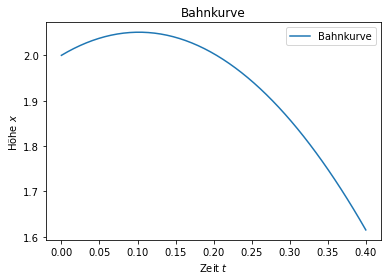

In [3]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
# Plot initialisieren
fig, bkv = plt.subplots()
# Beschriftungen
bkv.set_title("Bahnkurve")
bkv.set_xlabel("Zeit $t$")
bkv.set_ylabel("Höhe $x$")
# t definieren
t = np.linspace(0, 0.4, 50)
bkv.plot(t, 2 + t - 9.81 * t ** 2 / 2, label="Bahnkurve")
bkv.legend()

**b)** Schreiben Sie die errechneten Werte $x_0,\; x_1 ...$ in ein numpy Array per Hand. Wählen Sie einen geeigneten Variablennamen für dieses Array.

In [4]:
#Anfangswerte zurücksetzen
x = 2
v = 1
# Array erstellen
xarray = np.array([])
# Array füllen
for k in range(5):
    xarray = np.append(xarray, x)
    [v, x] = schritt(v, x, 0.1, -9.81)

**c)** Erstellen Sie mittels `np.linspace()` ein weiteres Array für die fünf Zeitpunkte der numerischen Integration. Wählen Sie einen geeigneten Variablennamen für dieses Array.

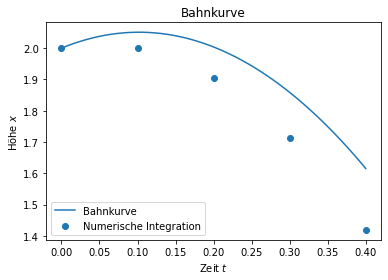

In [5]:
# Zeitachse generieren
tarray = np.linspace(0, 0.4, 5)
# noch einmal das ganze subplots-gerüst
fig, bkv = plt.subplots()
# Beschriftungen
bkv.set_title("Bahnkurve")
bkv.set_xlabel("Zeit $t$")
bkv.set_ylabel("Höhe $x$")
# t definieren
t = np.linspace(0, 0.4, 50)
bkv.plot(t, 2 + t - 9.81 * t ** 2 / 2, label="Bahnkurve")
# numerische Werte anzeigen
bkv.scatter(tarray, xarray, label="Numerische Integration")
# Legende anzeigen
bkv.legend()

**d)** Sie sollten nun zwei Arrays mit jeweils fünf Einträgen haben. Plotten Sie diese beiden arrays gegeneinander, indem Sie das vorhandene Gerüst mit folgender Zeile erweitern:
```python
ax.scatter(t, x, label='numerische Integration')
```
wobei `t` und `x` die zwei Arrays der numerischen Integration sind. Ändern Sie die Legende und die Achsenbeschriftungen, sodass Ihr Diagramm wie folgt ausssieht:

<img src="./bahnkurve.png" alt="drawing" width="400"/>

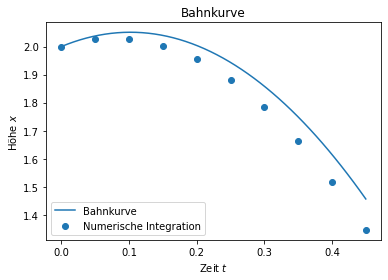

In [6]:
#Anfangswerte zurücksetzen
x = 2
v = 1
# Array erstellen
xarray = np.array([])
# Array füllen
for k in range(10):
    xarray = np.append(xarray, x)
    [v, x] = schritt(v, x, 0.05, -9.81)
# Zeitachse generieren
tarray = np.linspace(0, 0.45, 10)
# noch einmal das ganze subplots-gerüst
fig, bkv = plt.subplots()
# Beschriftungen
bkv.set_title("Bahnkurve")
bkv.set_xlabel("Zeit $t$")
bkv.set_ylabel("Höhe $x$")
# t definieren
t = np.linspace(0, 0.45, 50)
bkv.plot(t, 2 + t - 9.81 * t ** 2 / 2, label="Bahnkurve")
# numerische Werte anzeigen
bkv.scatter(tarray, xarray, label="Numerische Integration")
# Legende anzeigen
bkv.legend()

**e)** Wie Sie sehen, weicht die numerische Lösung von der analytischen ab. Dies liegt an der Genauigkeit des Lösungsverfahrens und an der Größe des Integrationsschrittes $\Delta t$. Wiederholen Sie daher die numerische Integration mit einem halb so großen Zeitschritt $\Delta t = 0.05$ bei sonst gleichen Anfangsbedingungen. Damit die Integrationszeit konstant bleibt, müssen Sie mehr Integrationsschritte durchführen. Machen Sie sich klar, wie viele Schritte Sie benötigen. Stellen Sie das Ergenbis erneut in einem Plot dar. Wählen Sie eine geeignete Legende.  Verlgeichen Sie die Trajektorien der beiden numerischen Lösungen. Was fällt Ihnen auf?

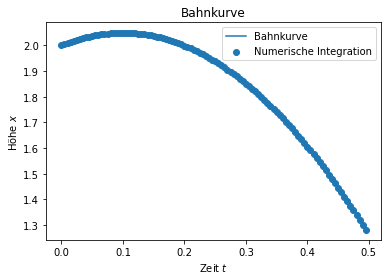

In [7]:
# Passt besser. vielleicht mit 100 schritten noch besser:
#Anfangswerte zurücksetzen
x = 2
v = 1
# Array erstellen
xarray = np.array([])
# Array füllen
for k in range(100):
    xarray = np.append(xarray, x)
    [v, x] = schritt(v, x, 0.005, -9.81)
# Zeitachse generieren
tarray = np.linspace(0, 0.495, 100)

# noch einmal das ganze subplots-gerüst
fig, bkv = plt.subplots()
# Beschriftungen
bkv.set_title("Bahnkurve")
bkv.set_xlabel("Zeit $t$")
bkv.set_ylabel("Höhe $x$")
# t definieren
t = np.linspace(0, 0.49, 50)
bkv.plot(t, 2 + t - 9.81 * t ** 2 / 2, label="Bahnkurve")
# numerische Werte anzeigen
bkv.scatter(tarray, xarray, label="Numerische Integration")
# legende
bkv.legend()
# tatsächlich